
# Choropleth Maps

![](https://upload.wikimedia.org/wikipedia/commons/f/f7/Australian_Census_2011_demographic_map_-_Australia_by_SLA_-_BCP_field_2715_Christianity_Anglican_Persons.svg)

Choropleth Maps are maps where the color of each shape is based on the value of a variable.

## Library Installation Instructions 

### If you are using Anaconda on your laptop
Execute the following cell exactly once. It will install the needed software on your laptop

### If you are using Google Colab
Execute the following cell each time you open this notebook

In [1]:
!pip install geopandas

    100% |████████████████████████████████| 901kB 9.5MB/s eta 0:00:01
    100% |████████████████████████████████| 24.5MB 1.2MB/s ta 0:00:011
    100% |████████████████████████████████| 2.8MB 8.4MB/s eta 0:00:01
    100% |████████████████████████████████| 1.6MB 15.2MB/s ta 0:00:01
  Running setup.py bdist_wheel for pyproj ... done
  Stored in directory: /Users/raz/Library/Caches/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
  Running setup.py bdist_wheel for munch ... done
  Stored in directory: /Users/raz/Library/Caches/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built pyproj munch
distributed 1.21.8 requires msgpack, which is not installed.
keras 2.2.2 has requirement keras_applications==1.0.4, but you'll have keras-applications 1.0.2 which is incompatible.
keras 2.2.2 has requirement keras_preprocessing==1.0.2, but you'll have keras-preprocessing 1.0.1 which is incompatible.
Cache entry deserialization failed, entry ign

## The Descartes Library
We also need to install the descartes library. The same rules apply. If you are using Anaconda on your laptop you 
only need to run this cell exactly once. With Colab you need to execute it each time you open this notebook.

In [9]:
!pip install descartes

distributed 1.21.8 requires msgpack, which is not installed.
keras 2.2.2 has requirement keras_applications==1.0.4, but you'll have keras-applications 1.0.2 which is incompatible.
keras 2.2.2 has requirement keras_preprocessing==1.0.2, but you'll have keras-preprocessing 1.0.1 which is incompatible.
You are using pip version 10.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Now let's use the library we installed.

First we will load in a dataset of countries and some cities.


In [10]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

## Creating a simple world plot



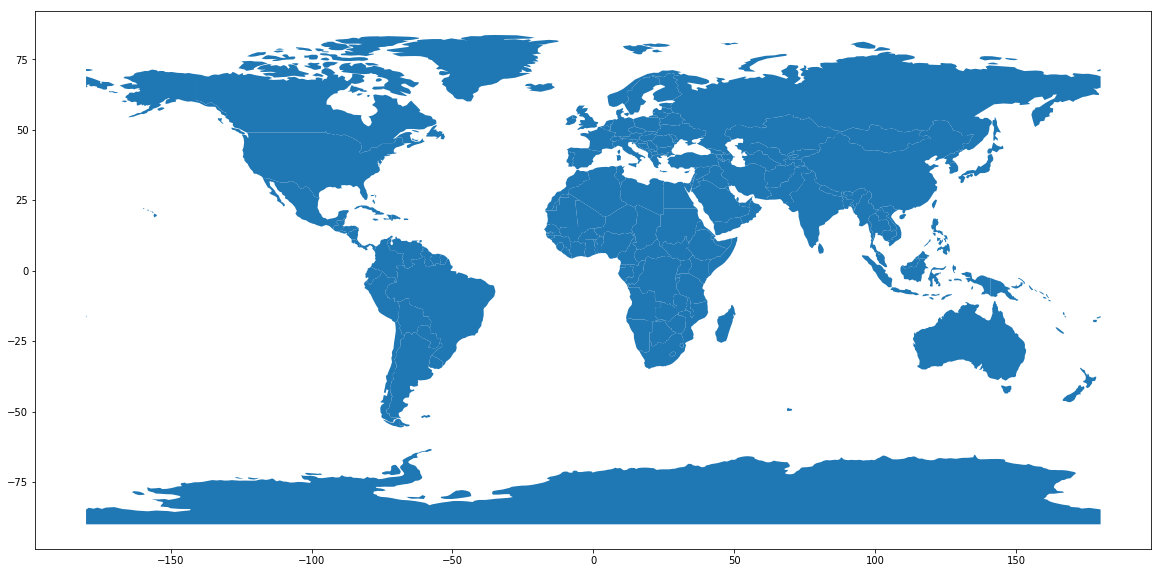

In [11]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, figsize=(20,10))
world.plot(ax=ax)

That blob on the bottom is Antarctica. Let's delete it (remember that `!=` means *not equal to*:

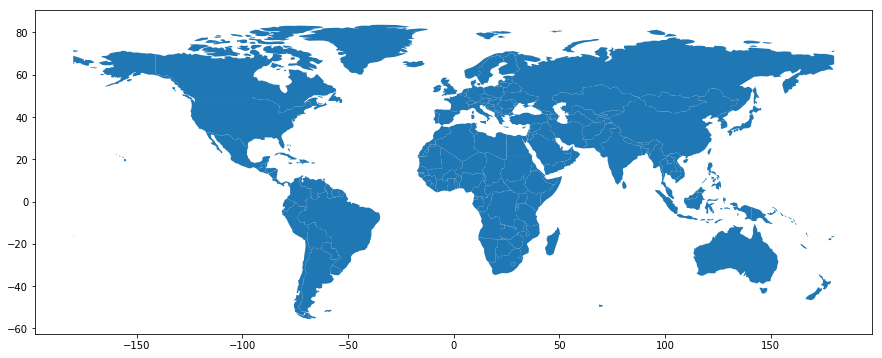

In [33]:
world2 = world[world.name != 'Antarctica']
f, ax = plt.subplots(1, figsize=(15,10))
world2.plot(ax=ax)

That is beautiful, but let's see if we can make it informative.

### The world Pandas dataframe
Let's take a look at the world dataframe:

In [34]:
world2.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


It has a column for estimated population `pop_est`.  Let's see if there are any countries with zero population:

In [35]:
world2[world2.pop_est == 0]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry


That makes sense. No country has zero population. Let's do one more sanity check and see if any country has a negative population

In [43]:
world2[world2.pop_est < 0]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_capita
137,-99.0,Africa,W. Sahara,ESH,-99.0,POLYGON ((-8.794883999049077 27.12069631602251...,1.0


So W. Sahara has a population of -99. That probably means we have no population data for that country. Let's go ahead and delete it from our dataset:

In [66]:
world3 = world2[world2['name'] != 'W. Sahara']

Great! The `gdp_md_est` column has to do with Gross Domestic Product. Let's color code our map based on GDP per Capita

![](https://www.thebalance.com/thmb/KR6vlAcn_Q-YIj0DGf-uyRS7SyA=/400x0/gdp-per-capita-formula-u-s-compared-to-highest-and-lowest-3305848-v2-5b71efd746e0fb004f595b3e.png)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


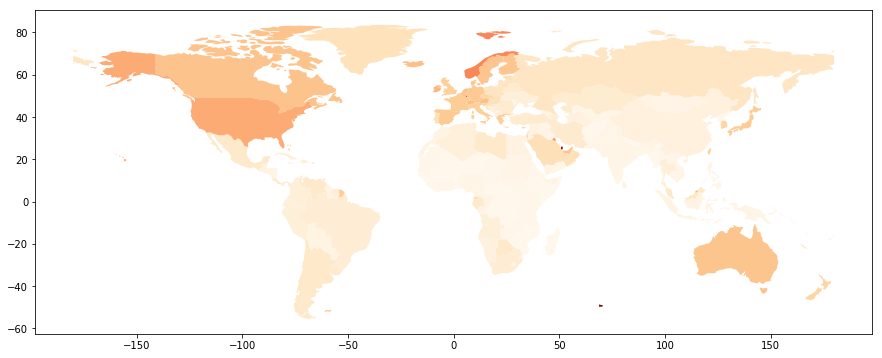

In [67]:
# first make a gdp_per_capita coluum
world3['gdp_per_capita'] = world3.gdp_md_est / world3.pop_est
f, ax = plt.subplots(1, figsize=(15,10))
world3.plot(column='gdp_per_capita', cmap='OrRd', ax=ax)

### Nice!


## The Human Freedom Data
Now Let's see if we can combine this data with the Human Freedom Dataset. First, let's load that dataset

In [61]:
import pandas as pd
hf = pd.read_csv('http://zacharski.org/files/courses/data101/hfi_cc_2018.csv')
hf.head()

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


The human freedom dataset has data for the years 2008-2016. Let's just use the 2016 data:

In [62]:
hf2016 = hf[hf['year'] == 2016]
hf2016.head()

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


### review

Let's review the datasets we have:

* **world3** The important thing this dataset has is the geometry column which describes how to draw the map.
* **hf2016** The human freedom dataset for 2016 which we want to use to display the human freedom score.

Somehow, we need to combine these datasets into one. Let's do it step by step:

### Step 1 use the ISO codes to index each dataset
If we look at the first few entries of each dataset:

In [50]:
world3.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_capita
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",0.000784
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,0.008618
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",0.005993
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",0.038408
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,0.014027


In [63]:
hf2016.head()

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


We see that each has a column for the three character code for a country. For example, ALB is Albania, ARG is Argentina and so on. We are going to set the index for each of these datasets to that column:

In [64]:
hf2016.set_index('ISO_code', inplace=True)
hf2016.head()

,year,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
ISO_code,,,,,,,,,,,,,,,,,,,,,
ALB,2016,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,10.00000,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
DZA,2016,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,9.29403,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
AGO,2016,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,10.00000,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
ARG,2016,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,10.00000,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
ARM,2016,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,10.00000,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


In [68]:
world3.set_index('iso_a3', inplace=True)
world3.head()

,pop_est,continent,name,gdp_md_est,geometry,gdp_per_capita
iso_a3,,,,,,
AFG,28400000.0,Asia,Afghanistan,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",0.000784
AGO,12799293.0,Africa,Angola,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,0.008618
ALB,3639453.0,Europe,Albania,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",0.005993
ARE,4798491.0,Asia,United Arab Emirates,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",0.038408
ARG,40913584.0,South America,Argentina,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,0.014027


### Step 2 Decide on which columns to join
Let's say we are interested in displaying the human freedom score (`hf_score`) and the economic freedom score (`ef_score`). Let's create a dataframe with just these columns.


In [70]:
hf_ef = hf2016[['hf_score', 'ef_score']]
hf_ef.head()

,hf_score,ef_score
ISO_code,,
ALB,7.568140,7.54
DZA,5.135886,4.99
AGO,5.640662,5.17
ARG,6.469848,4.84
ARM,7.241402,7.57


### Step 3 Join the DataFrames
Let's join this `hf_ef` dataframe with the `world3` one.

In [129]:
combined = world3.join(hf_ef)
combined.head()

,pop_est,continent,name,gdp_md_est,geometry,gdp_per_capita,hf_score,ef_score
-99,265100.0,Asia,N. Cyprus,3600.0,"POLYGON ((32.73178022637745 35.14002594658844,...",0.013580,NaN,NaN
-99,1804838.0,Europe,Kosovo,5352.0,"POLYGON ((20.76215999999999 42.05186000000003,...",0.002965,NaN,NaN
-99,3500000.0,Africa,Somaliland,12250.0,"POLYGON ((48.93812951029651 9.451748968946674,...",0.003500,NaN,NaN
AFG,28400000.0,Asia,Afghanistan,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",0.000784,NaN,NaN
AGO,12799293.0,Africa,Angola,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,0.008618,5.640662,5.17


### Step 4 Clean things up

We see that some countries have `NaN` for their `hf_score` or `ef_score`. `NaN` stands for **not a number**. This is caused by the Human Freedom dataset not having data for some of the countries in the world3 dataset. Let's delete all the rows that contain `NaN`


In [130]:
combined.dropna(inplace=True)

### Step 5 Display the Human Freedom Information

Finally we can make our color-coded map


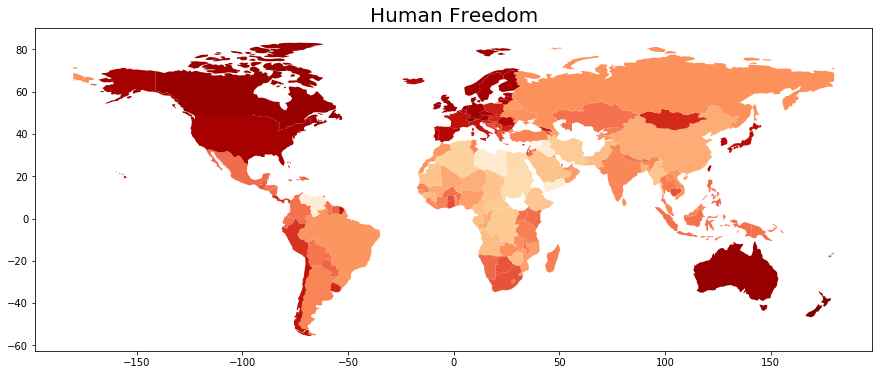

In [131]:
f, ax = plt.subplots(1, figsize=(15,10))
plt.title("Human Freedom", fontsize=20)
combined.plot(column='hf_score', cmap='OrRd', ax=ax)

# You try.

## 1. Simple task
Can you create a choropleth map showing the economic freedom of countries of the world? Use a different color than the one above. ([Here is a description of all the color choices](https://matplotlib.org/users/colormaps.html).

## 2. Harder task

Let's work with some state data. Download the file [gz_2010_us_040_00_5m.zip](http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.zip) and unzip it.

Next, let's read the file and display the United States (you will need to change the file location to match your laptop)

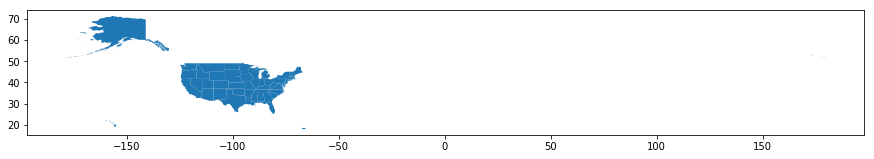

In [127]:
us = geopandas.read_file("/Users/raz/Downloads/gz_2010_us_040_00_5m/gz_2010_us_040_00_5m.shp")
f, ax = plt.subplots(1, figsize=(15,10))
us.plot(ax=ax)

That doesn't look so good. The United States is tiny and off to the left. This is because of Alaska, Hawaii and Puerto Rico. Let's get rid of these and try again.

In [107]:
## TODO


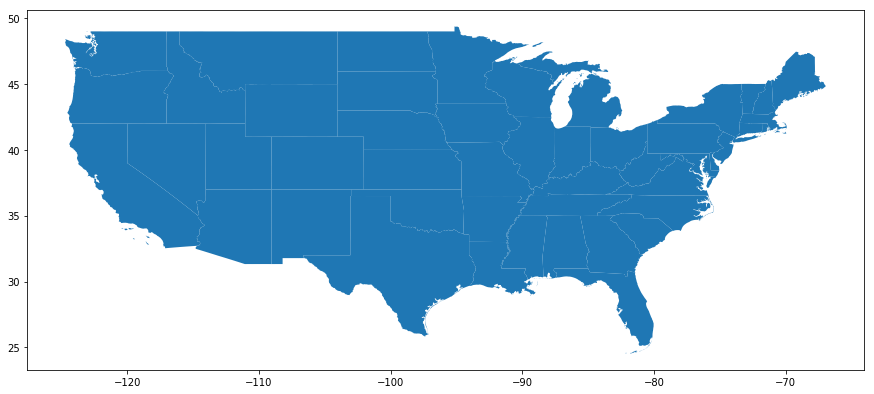

In [108]:
f, ax = plt.subplots(1, figsize=(15,10))
us.plot(ax=ax)

plt.show()

That looks great.

## Poverty in the US

We have some data on poverty in the US here: [http://zacharski.org/files/courses/data101/poverty.csv](http://zacharski.org/files/courses/data101/poverty.csv)

Can you display a choropleth map showing poverty in the US.

### NOTE: More XP will be given if your map has colors that best illustrate poverty.



# Task 3. 

Can you create a Choropleth map illustrating some data you find?